# Advanced Lane Finding Project - [./P2_01_02a_Thresholds.ipynb](./P2_01_02a_Thresholds.ipynb)

### Camera Calibration

Compute the camera matrix and distortion coefficients.

Output images appear in the [./output_images](./output_images) folder.

In [1]:
# Camera Calibration
# Compute the camera matrix and distortion coefficients.

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path        # Draw polyline for transform points
import matplotlib.patches as patches    # Draw polyline for transform points
import os
from os import path
import scipy.misc          # Easily save thresholded images from 64-bit matrices

%matplotlib qt
%matplotlib inline



# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = sorted(glob.glob('./camera_cal/calibration*.jpg'))

# Step through the list of provided calibration images and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners (9 x 6)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, add object points, image points
    if ret == True:
        
        # Save image and show original image in left subplot
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", ".png")
        cv2.imwrite(outfname, img)
        
        # Convert color for inline matplotlib display
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#         fig, ax = plt.subplots(1, 2, figsize=(16,5))
#         fig.tight_layout()
#         ax[0].set_title(fname + ' || Original Chessboard Image')
#         ax[0].imshow(img)
        
        # Object & Image points
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cc_img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        # Show image in external window
        # cv2.imshow('img',img)
        # cv2.waitKey(500)
        
        # Save image and show in right subplot with identified corners
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", "_corners.png")
        cv2.imwrite(outfname, cc_img)
        
        # Convert color for inline matplotlib display
        cc_img = cv2.cvtColor(cc_img, cv2.COLOR_BGR2RGB)
        
#         ax[1].set_title(outfname + ' || Chessboard Image with Identified Corners')
#         ax[1].imshow(cc_img)
        
#         # Save plot as image
#         outfname = outfname.replace("_corners.png", "_corners_plot.png") 
#         plt.savefig(outfname, bbox_inches='tight')
                
# cv2.destroyAllWindows()


#### Calibration and Image Undistortion

Undistort the chessboard images using the object points and image points from the previous cell.

Output images appear in the [./output_images](./output_images) folder.

In [2]:
# Take an image, object points, and image points,
# perform camera calibration, image distortion correction, and 
# return the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist



# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("camera_cal", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    cv2.imwrite(outfname, undistorted_img)
    
    # Convert color for inline matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    
#     # Show original and final output images
#     fig, ax = plt.subplots(1, 2, figsize=(16,5))
#     fig.tight_layout()
#     ax[0].set_title(fname + ' || Original Image')
#     ax[0].imshow(img)
#     ax[1].set_title(outfname + ' || Undistorted Image')
#     ax[1].imshow(undistorted_img)

#     # Save plot as image
#     outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

### Pipeline - Single (Still) Images

1. Provide an example of a distortion-corrected image.

In [3]:
# Pipeline - Single (Still) Images
# 1. Provide an example of a distortion-corrected image.

# Make a list of calibration images
images = sorted(glob.glob('./test_images/*.jpg'))

# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("test_images", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    cv2.imwrite(outfname, undistorted_img)

    # Convert color for inline matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    
#     # Show original and final output images
#     fig, ax = plt.subplots(1, 2, figsize=(16,5))
#     fig.tight_layout()
#     ax[0].set_title(fname + ' || Original Image')
#     ax[0].imshow(img)
#     ax[1].set_title(outfname + ' || Undistorted Image')
#     ax[1].imshow(undistorted_img)

#     # Save plot as image
#     outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

2. Discuss how color transforms, gradients, or other methods to create a thresholded binary image were used.  Identify where this was used in the source code.  Provide an example of a binary image result.

/home/ian/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


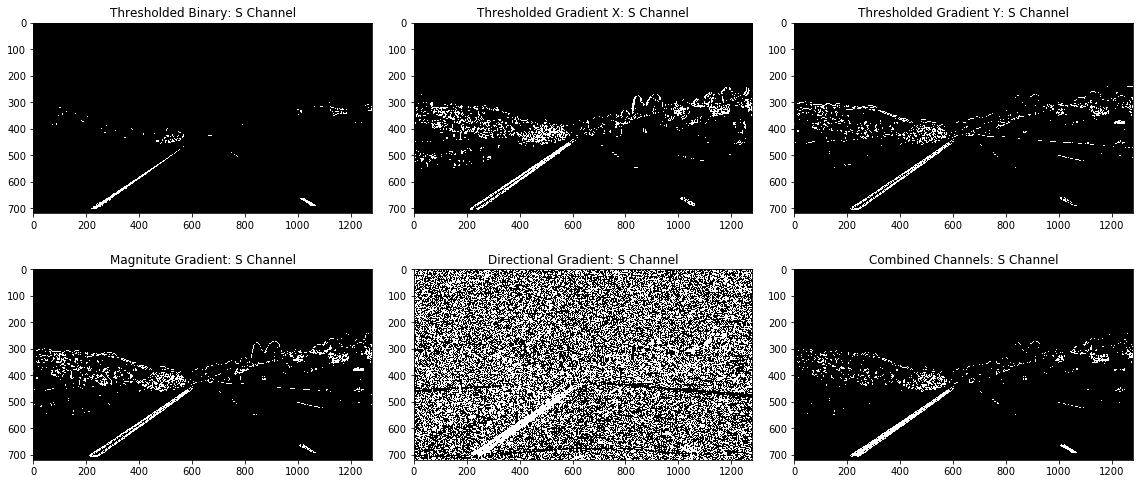

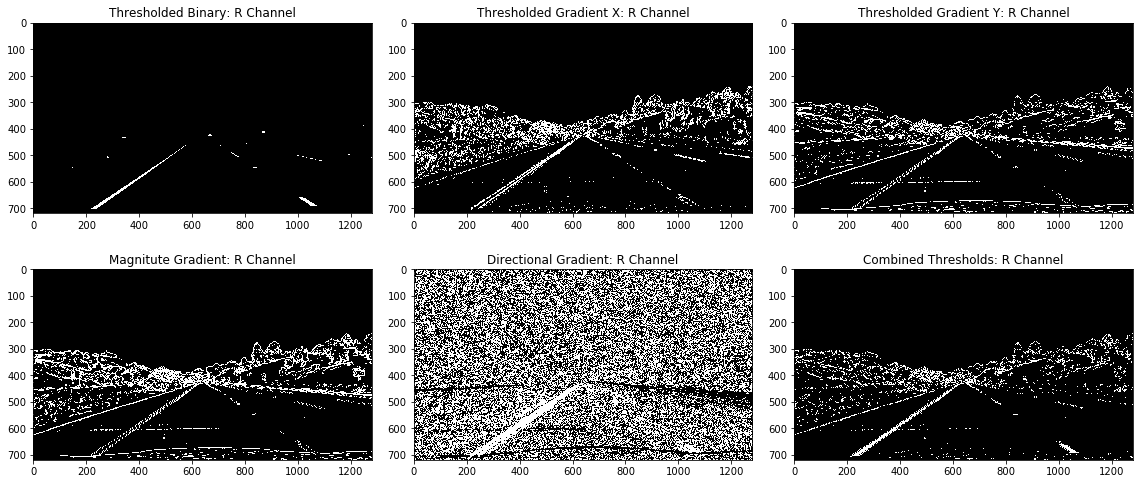

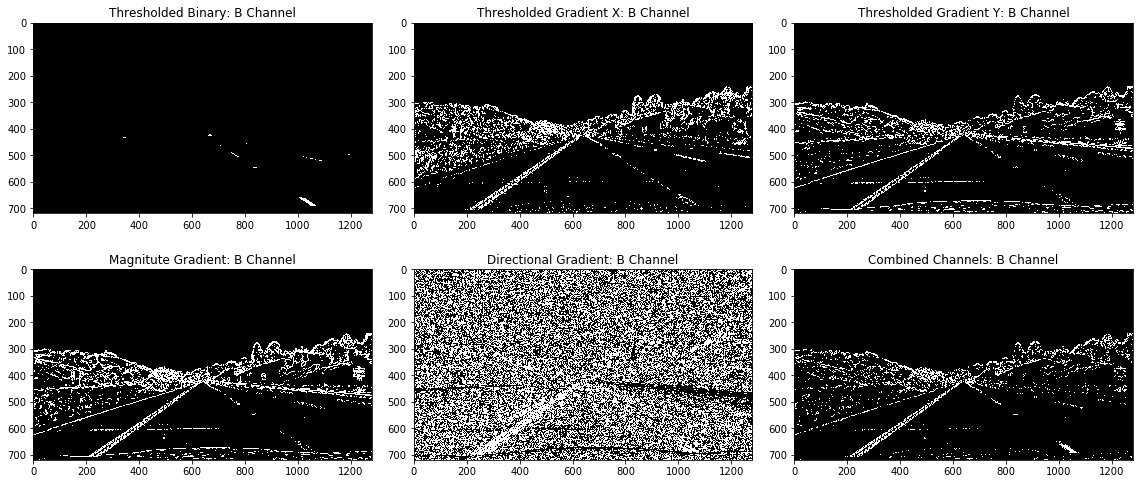

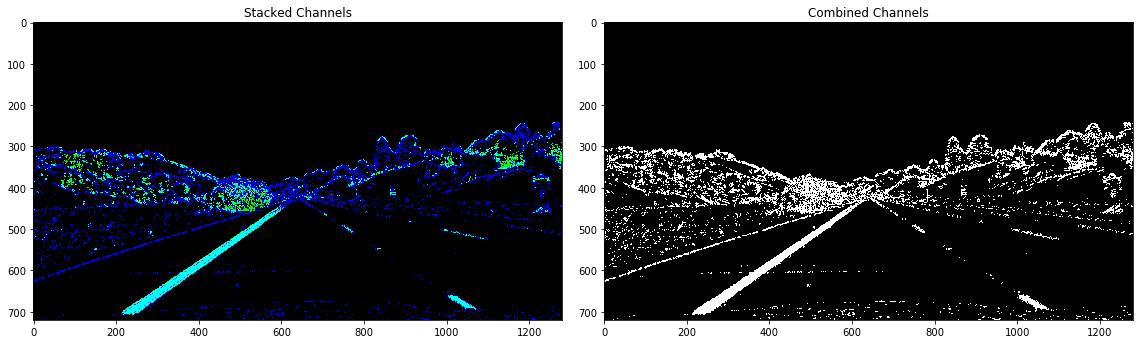

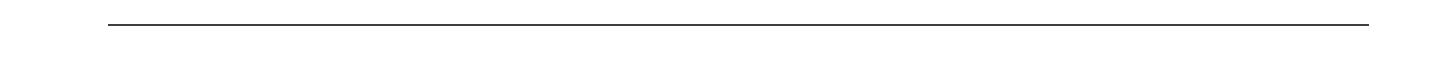

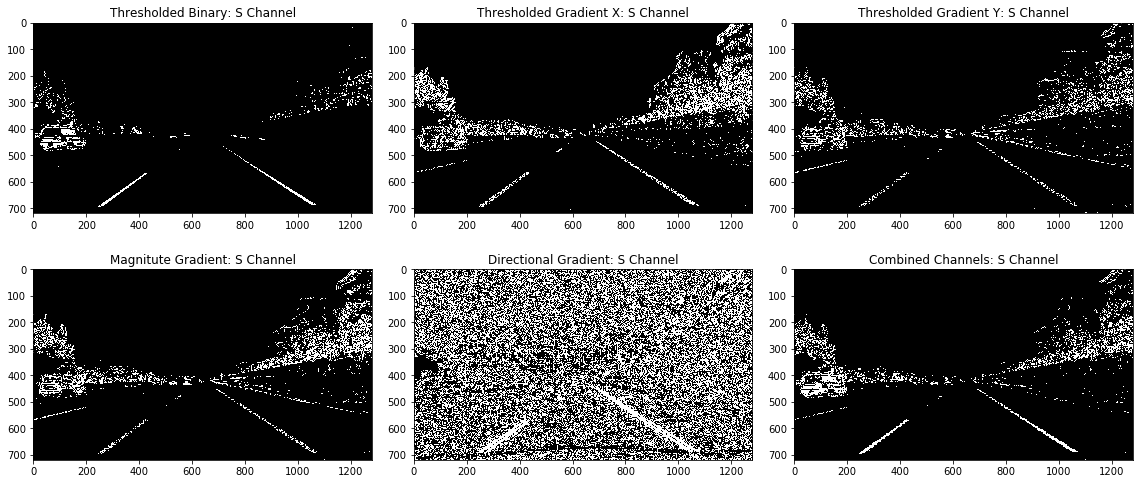

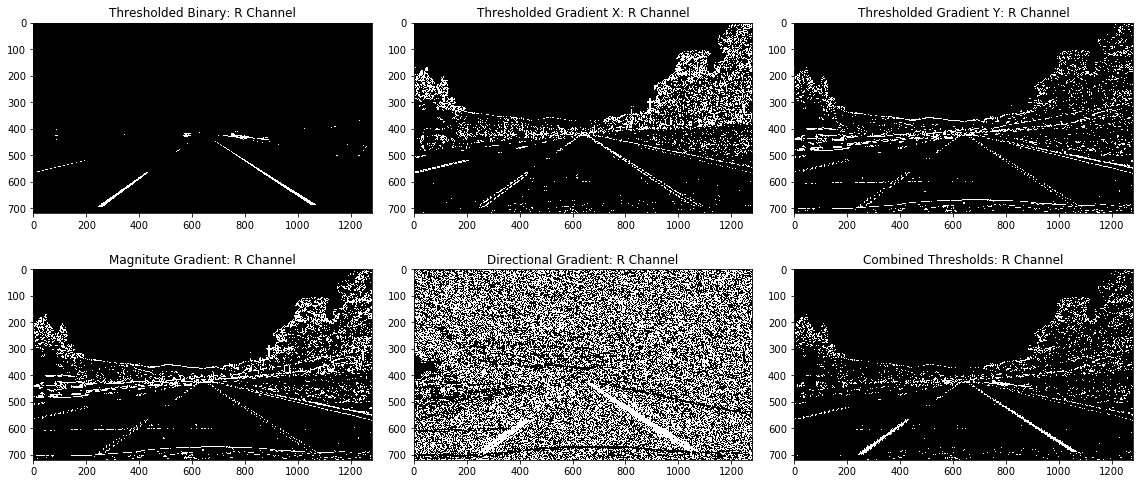

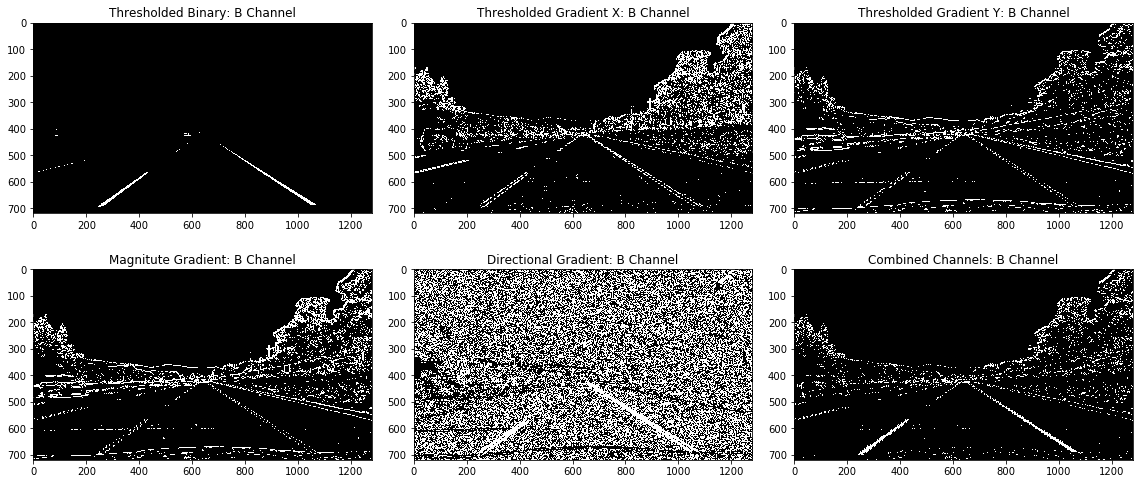

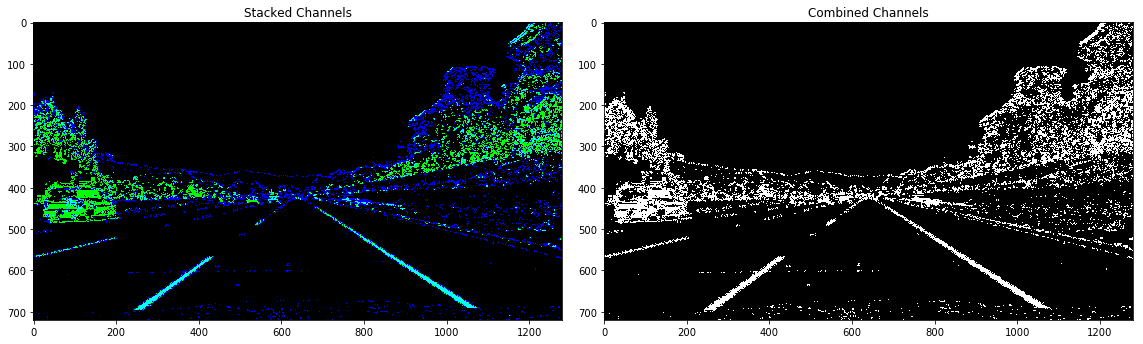

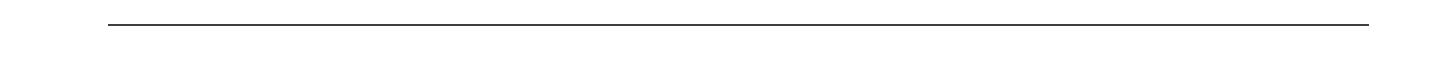

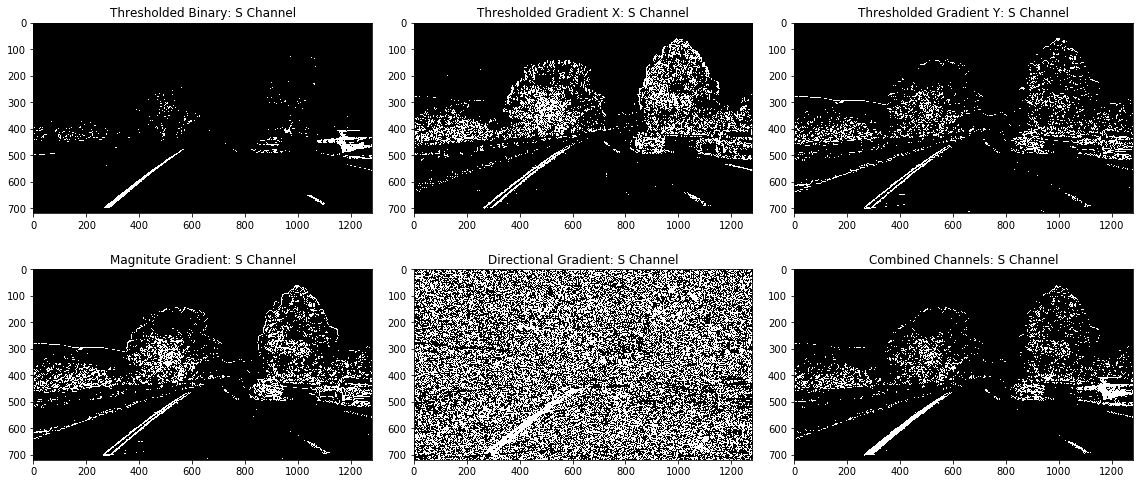

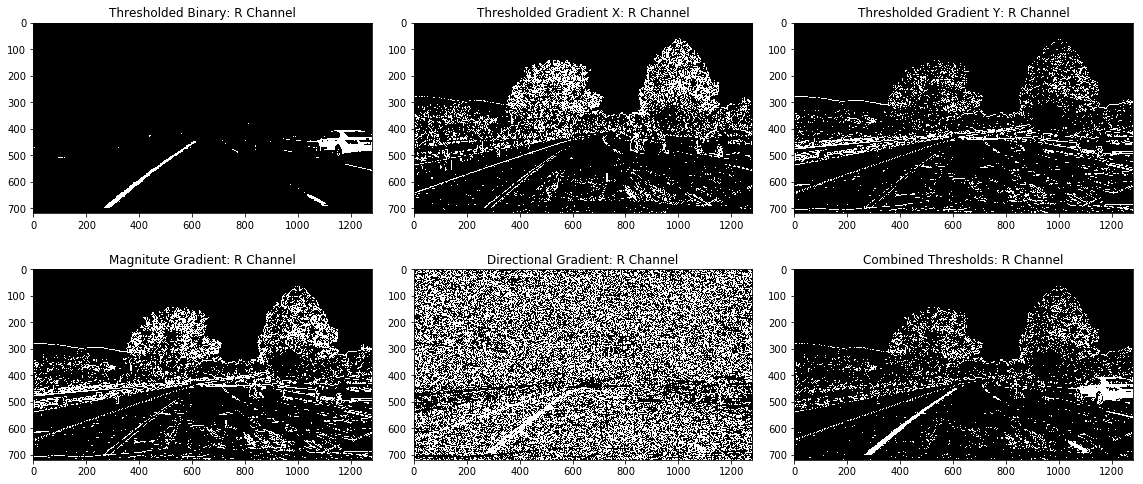

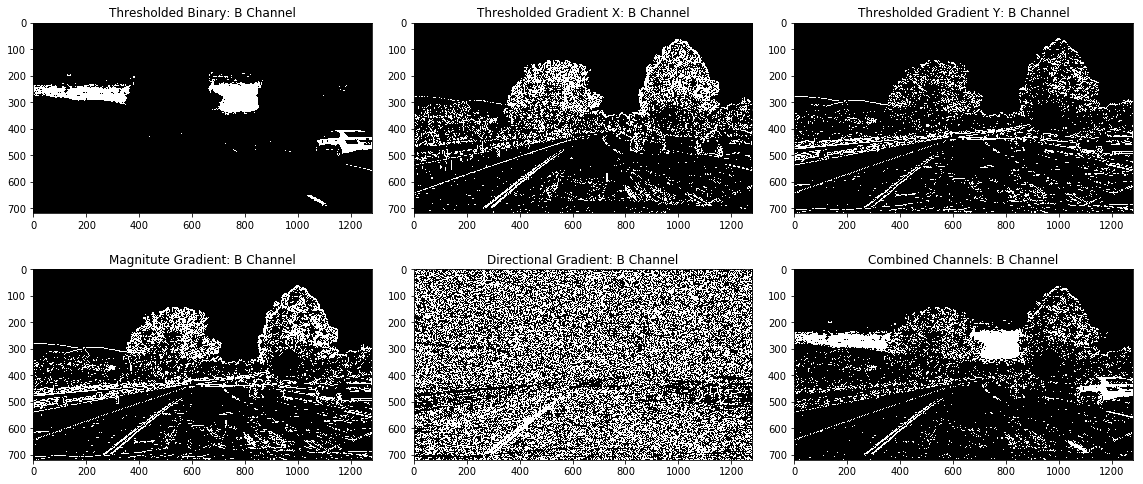

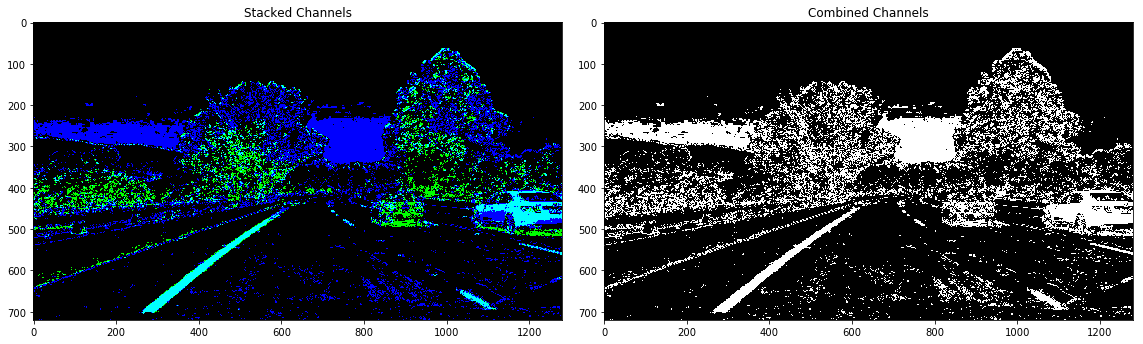

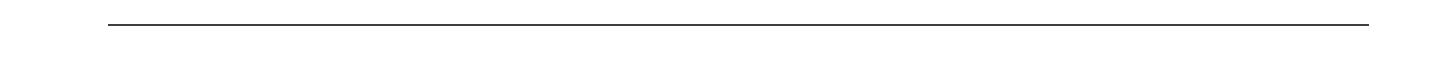

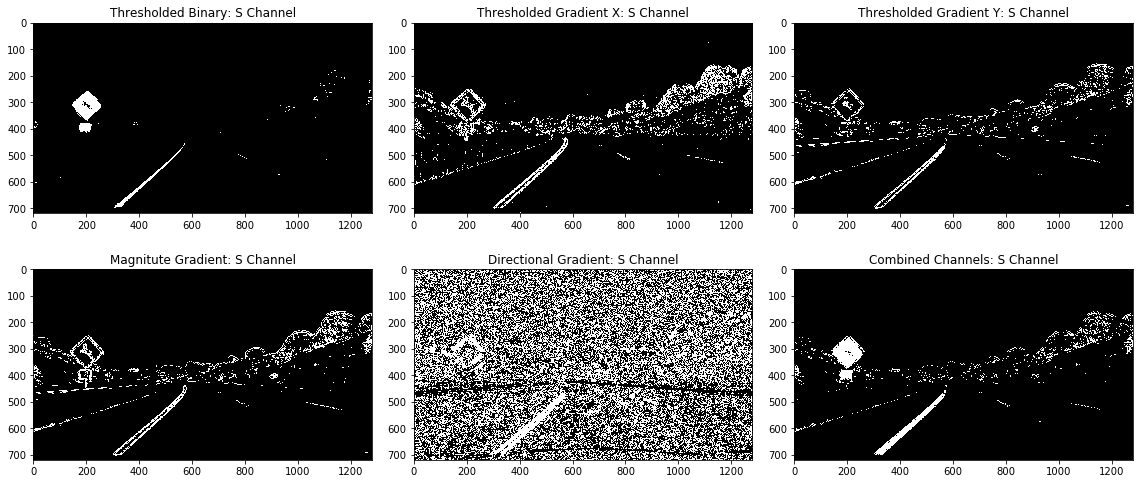

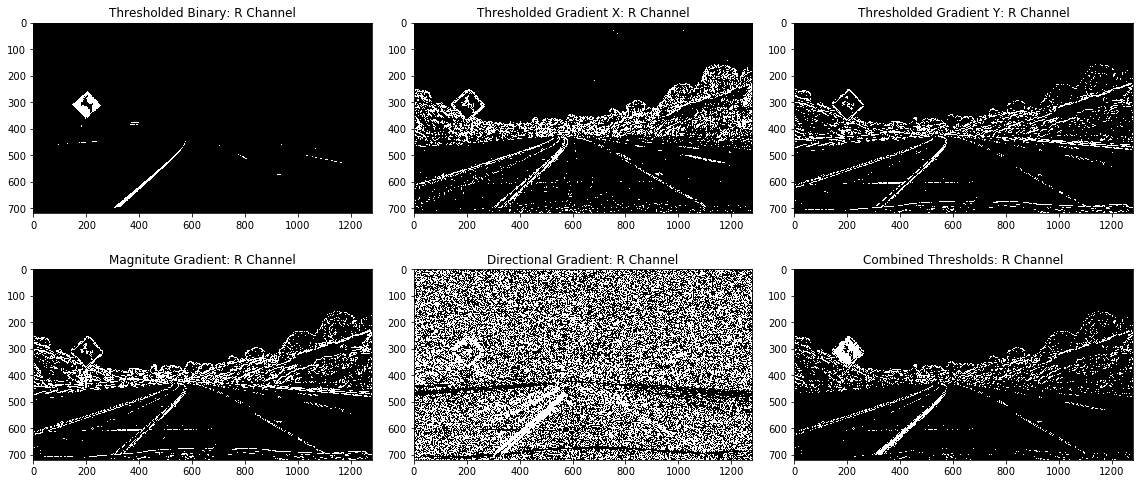

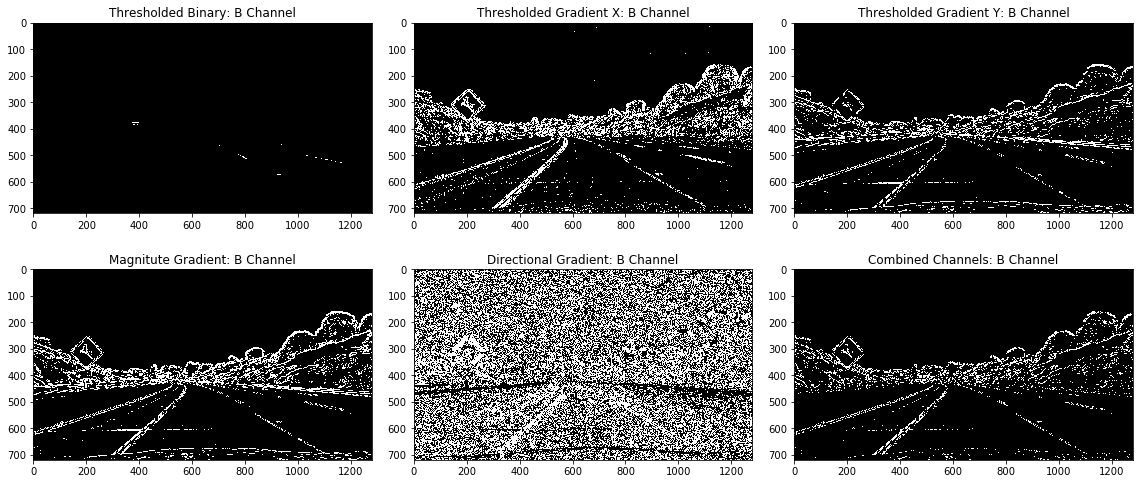

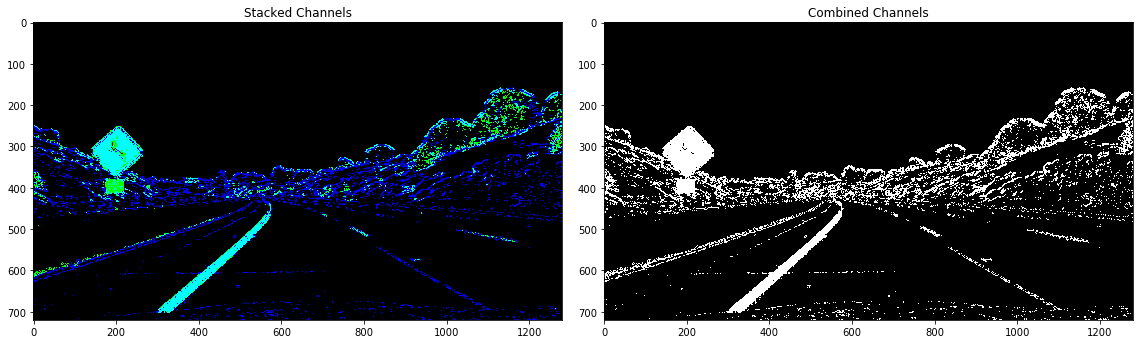

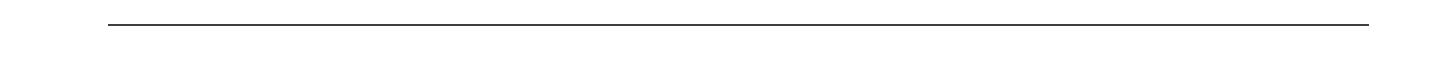

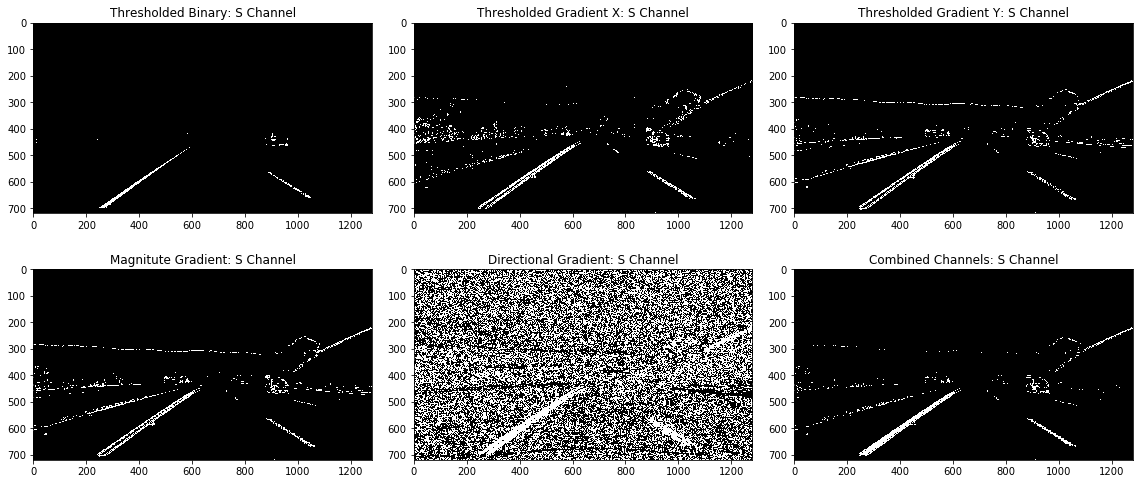

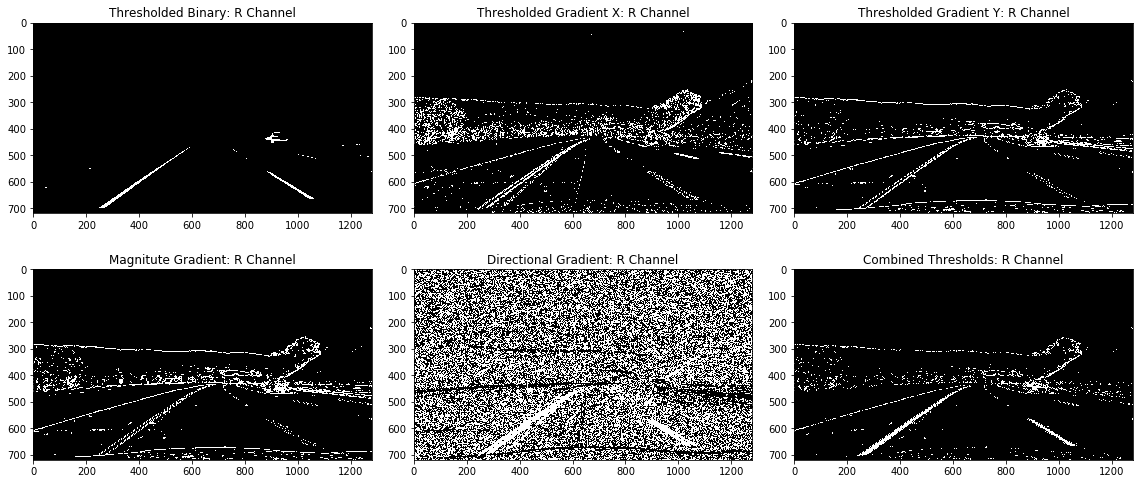

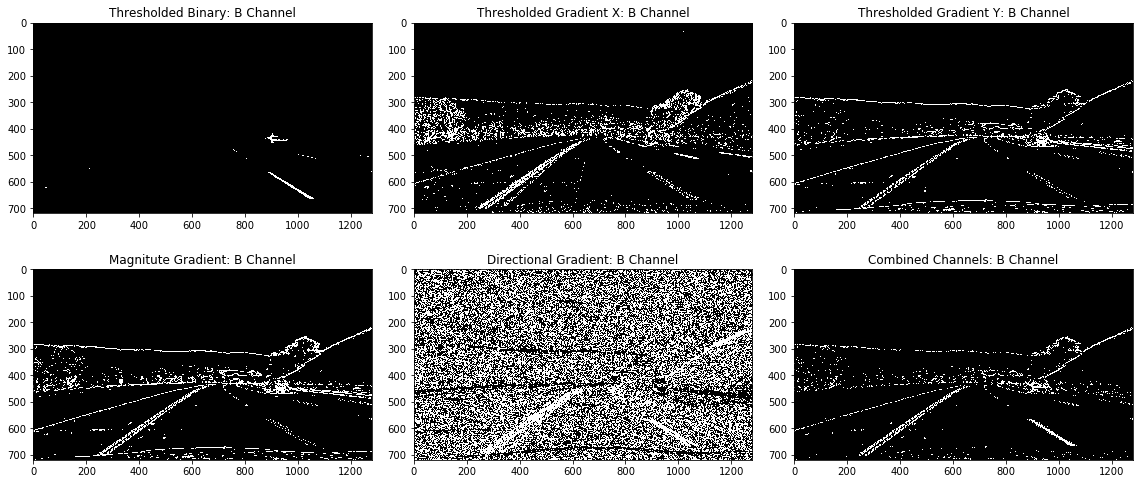

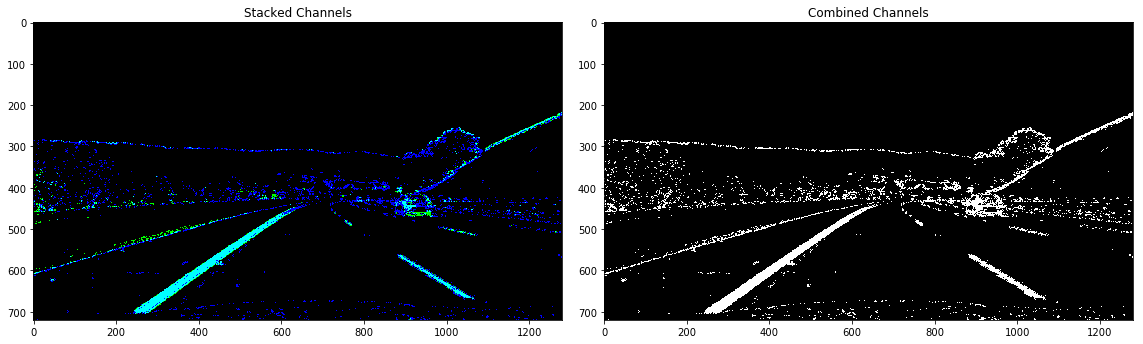

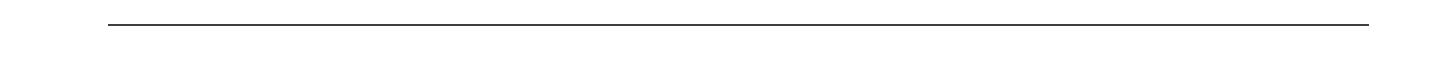

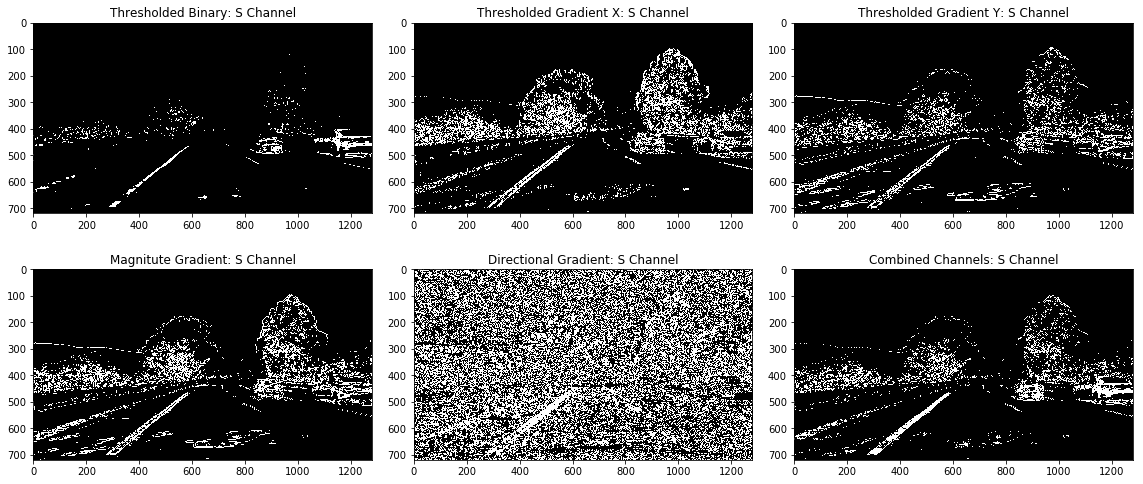

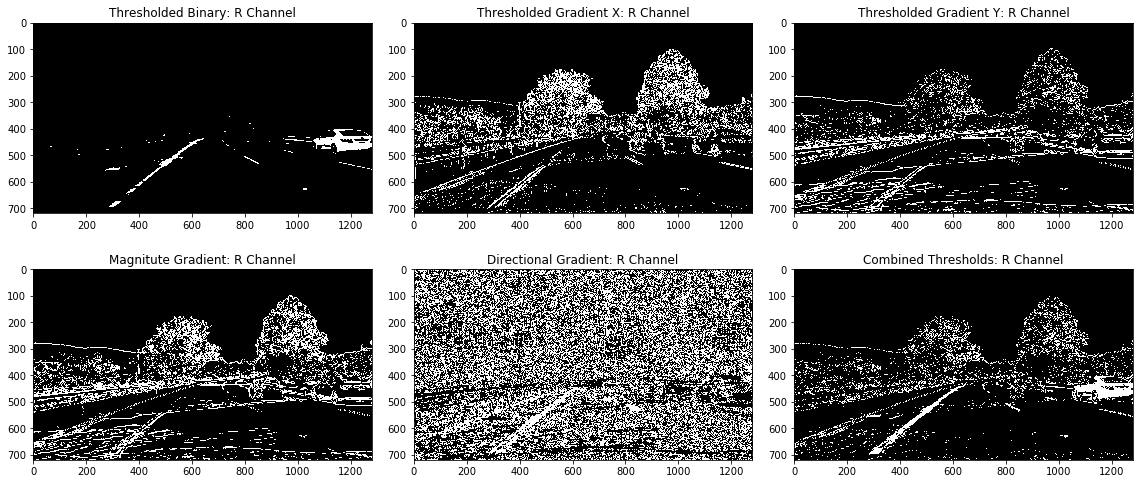

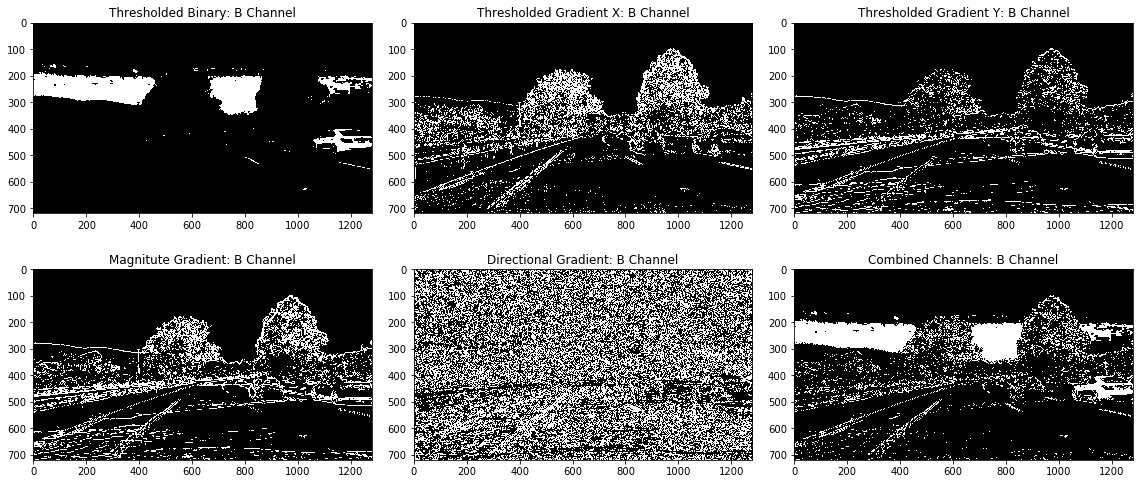

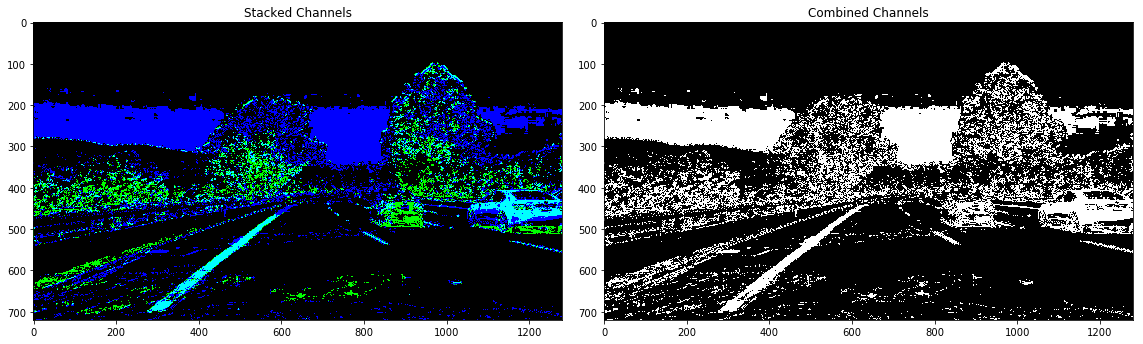

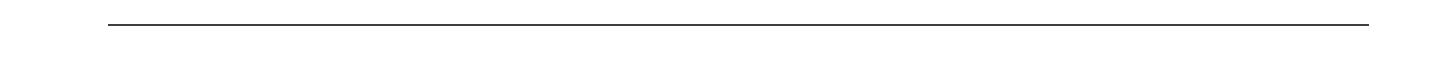

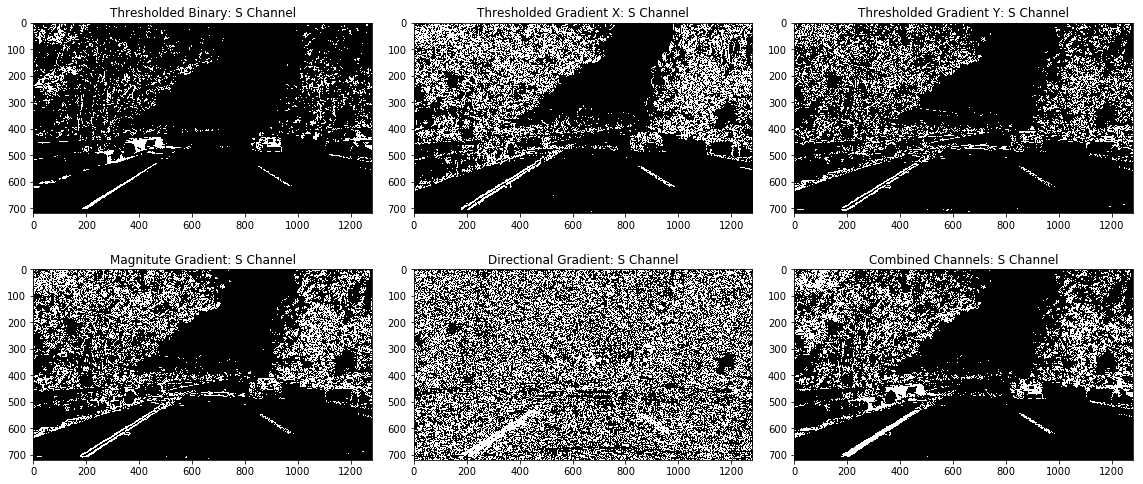

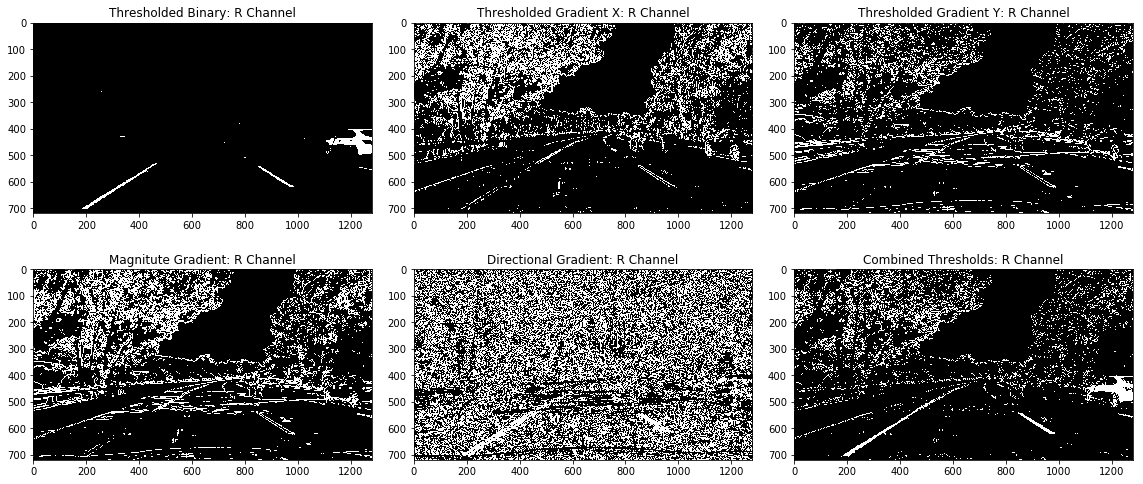

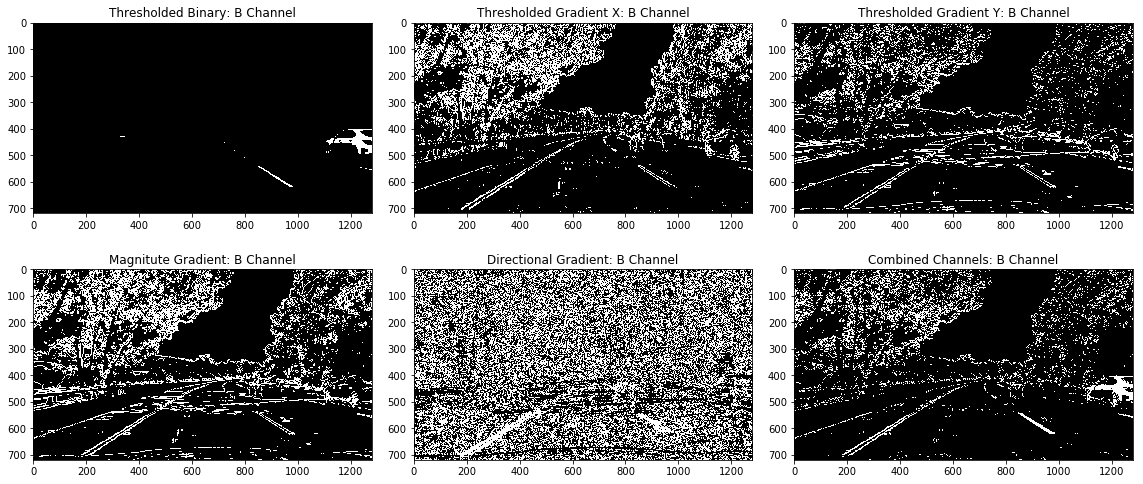

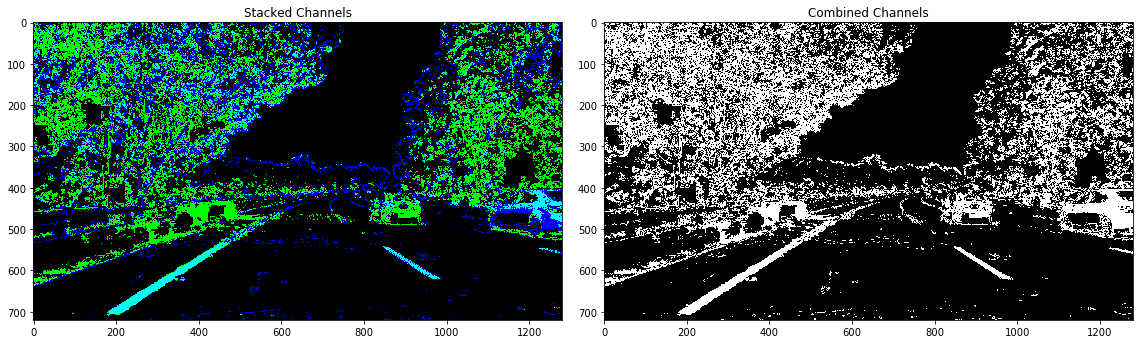

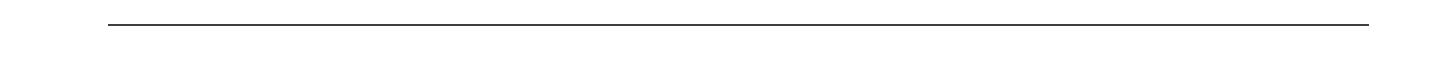

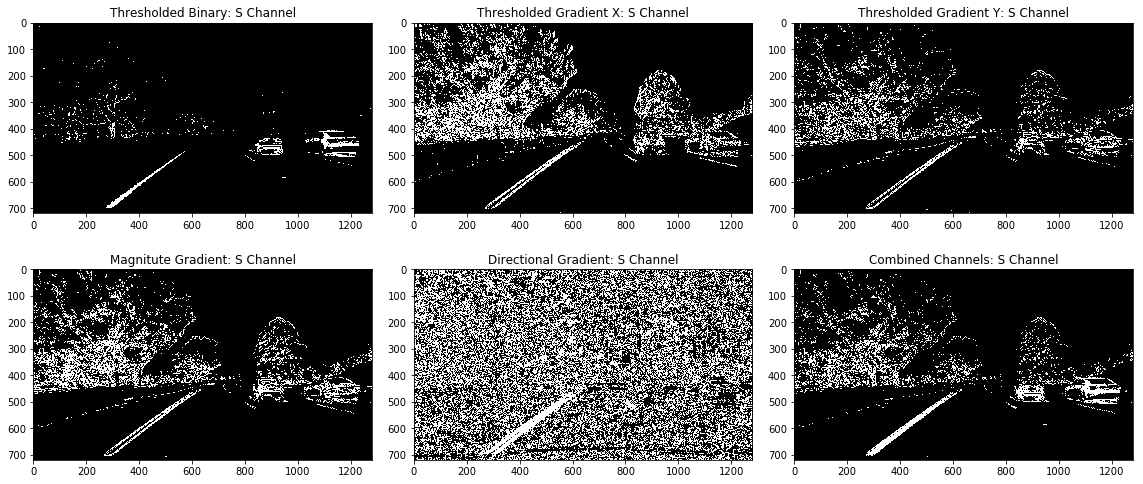

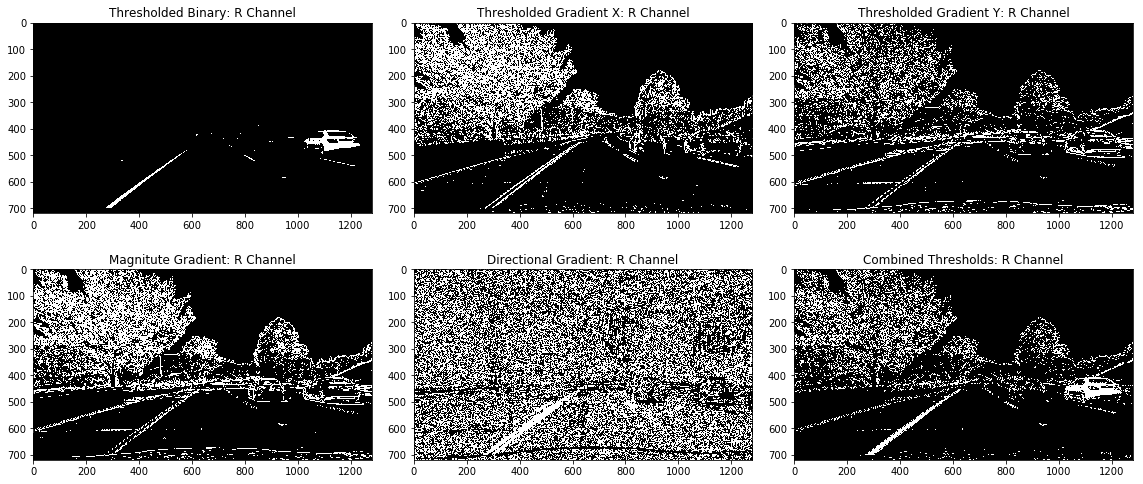

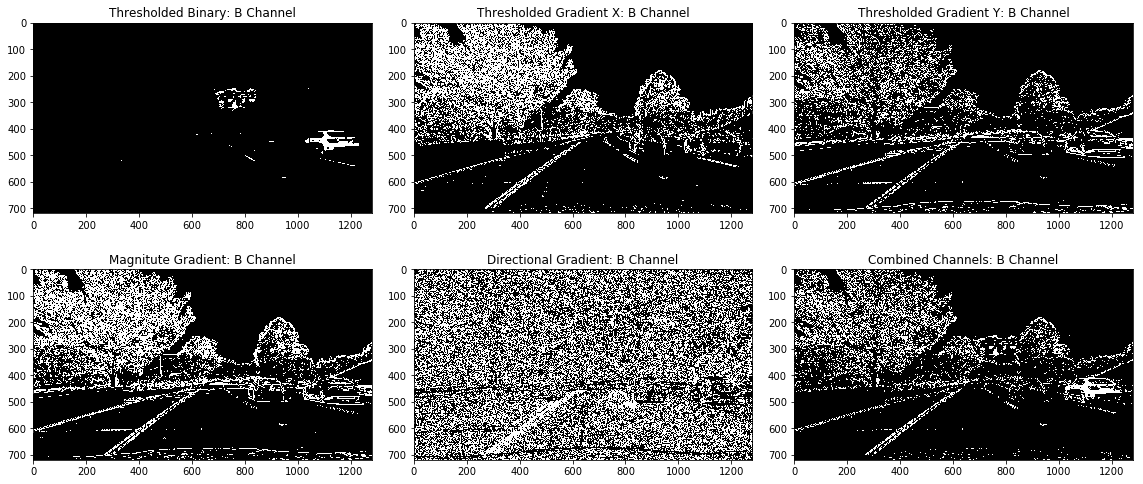

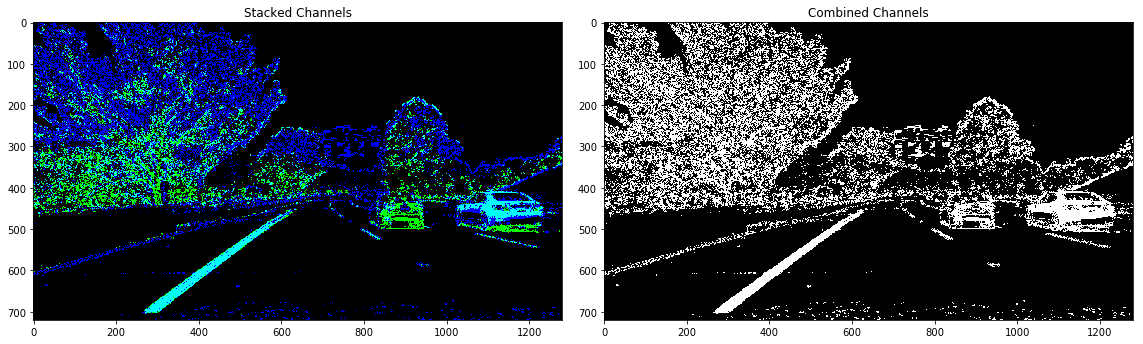

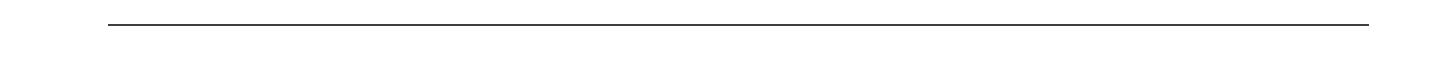

In [4]:
# 2. Discuss how color transforms, gradients, or other methods to create a thresholded binary image were used.  
#    Identify where this was used in the source code.  
#    Provide an example of a binary image result.

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(img, orient, sobel_kernel, thresh):
    
    # Convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        #print("Calculating the derivative (Sobel) in the", orient, "direction.")
        sobel_gray = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel) # Derivative in the x-direction
    elif orient == 'y':
        #print("Calculating the derivative (Sobel) in the", orient, "direction.")
        sobel_gray = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel) # Derivative in the y-direction
    else:
        # print("I cannot Sobel in the", orient, "direction!")
        # print("Calculating the derivative (Sobel) in the", orient, "direction.")
        sobel_gray = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel) # Derivative in the x-direction

    # Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel_gray)

    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Create a mask of 1's where the scaled gradient magnitude is > thresh_min and < thresh_max
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1

    # 6) Return this mask as your binary_output image
    abs_sobel_thresh_binary_output = np.copy(sobel_binary)
    
    return abs_sobel_thresh_binary_output
    

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold    
def mag_thresh(img, sobel_kernel, mag_thresh):
    
    # 1) Convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculate the gradient magnitude
    abs_sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    
    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    # Create a binary mask where mag thresholds are met
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1

    # Return this mask as your binary_output image
    mag_binary_output = np.copy(sobel_binary) # Not really necessary.  Could just return sobel_binary
    
    return mag_binary_output



# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel, thresh):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    # 3) Take the absolute value of the x and y gradients
    # abs_sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    abs_sobelx = np.sqrt(sobelx**2)
    abs_sobely = np.sqrt(sobely**2)

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    dir_binary_output = np.zeros_like(grad_dir)
    dir_binary_output[(grad_dir > thresh[0]) & (grad_dir < thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    # binary_output = np.copy(img) # Remove this line
    return dir_binary_output



# Apply a theshold to an individual channel
# or grayscale image
def channel_thresh(channel, threshold):
    binary = np.zeros_like(channel)
    binary[(channel >= threshold[0]) & (channel <= threshold[1])] = 1
    
    return binary



# Sobel kernel size
ksize = 11 # Larger odd number will smooth gradient measurements

# Gather undistorted road test images
images = sorted(glob.glob('./output_images/*_undistorted.png'))

road_images = []

for image in images:
    if "test" in image or "straight" in image:
        road_images.append(image)

# Loop through road test images. Separate color channels in RGB and HLS
for fname in road_images:
    img = cv2.imread(fname)

    # Create grayscale image and save
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    outfname = fname.replace("_undistorted.png", "_undistorted_gray.png") 
    cv2.imwrite(outfname, gray)
    
    # Create RGB image and save individual channels
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    outfname = fname.replace("_undistorted.png", "_undistorted_RGB.png") 
    cv2.imwrite(outfname, rgb)
    
    r_channel = rgb[:,:,0]
    outfname = fname.replace("_undistorted.png", "_undistorted_R_channel.png") 
    cv2.imwrite(outfname, r_channel)

    g_channel = rgb[:,:,1]
    outfname = fname.replace("_undistorted.png", "_undistorted_G_channel.png") 
    cv2.imwrite(outfname, g_channel)
    
    b_channel = rgb[:,:,2]
    outfname = fname.replace("_undistorted.png", "_undistorted_B_channel.png") 
    cv2.imwrite(outfname, b_channel)
    
    # Create HLS image and save individual channels
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    outfname = fname.replace("_undistorted.png", "_undistorted_HLS.png") 
    cv2.imwrite(outfname, hls)
    
    h_channel = hls[:,:,0]
    outfname = fname.replace("_undistorted.png", "_undistorted_H_channel.png") 
    cv2.imwrite(outfname, h_channel)

    l_channel = hls[:,:,1]
    outfname = fname.replace("_undistorted.png", "_undistorted_L_channel.png") 
    cv2.imwrite(outfname, l_channel)
    
    s_channel = hls[:,:,2]
    outfname = fname.replace("_undistorted.png", "_undistorted_S_channel.png") 
    cv2.imwrite(outfname, s_channel)
    
#     # Show original and grayscale output image
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].set_title(fname + " || RGB")
#     ax[0].imshow(rgb)
#     ax[1].set_title(fname + " || Gray")
#     ax[1].imshow(gray, cmap='gray')   
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_RGB_gray_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Show individual channels
#     fig, ax = plt.subplots(1, 3, figsize = (16, 5))
#     fig.tight_layout()
#     ax[0].set_title(fname + " || R channel")
#     ax[0].imshow(r_channel, cmap='gray')
#     ax[1].set_title(fname + " || G channel")
#     ax[1].imshow(g_channel, cmap='gray')
#     ax[2].set_title(fname + " || B channel")
#     ax[2].imshow(b_channel, cmap='gray')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_RGB_channels_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Show HLS and individual channels
#     fig, ax = plt.subplots(2, 2, figsize = (16, 10))
#     fig.tight_layout()
#     ax[0,0].set_title(fname + " || HLS")
#     ax[0,0].imshow(hls)
#     ax[0,1].set_title(fname + " || H channel")
#     ax[0,1].imshow(h_channel, cmap='gray')
#     ax[1,0].set_title(fname + " || L channel")
#     ax[1,0].imshow(l_channel, cmap='gray')
#     ax[1,1].set_title(fname + " || S channel")
#     ax[1,1].imshow(s_channel, cmap='gray')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_HLS_channels_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Separate images with horizontal line
#     fig, ax = plt.subplots(1, 1, figsize = (20, 1))
#     fig.tight_layout()
#     plt.axis('off')
#     ax.hlines(0, 0, 1, color='k')
    
    ##################################################################
    ### Apply Thresholds
    ##################################################################
    
    # S CHANNEL: Apply each of the thresholding functions
    gradx_s = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
    grady_s = abs_sobel_thresh(s_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary_s = mag_thresh(s_channel, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary_s = dir_threshold(s_channel, sobel_kernel=ksize, thresh=(0.5, 1.3))
    s_binary = channel_thresh(channel=s_channel, threshold=(170, 255))
    combined_s = np.zeros_like(dir_binary_s)
    combined_s[ (s_binary == 1) | (((gradx_s == 1) & (grady_s == 1)) | 
                                   ((mag_binary_s == 1) & (dir_binary_s == 1))) ] = 1

    # R CHANNEL: Apply each of the thresholding functions
    gradx_r = abs_sobel_thresh(r_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
    grady_r = abs_sobel_thresh(r_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary_r = mag_thresh(r_channel, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary_r = dir_threshold(r_channel, sobel_kernel=ksize, thresh=(0.5, 1.3))
    r_binary = channel_thresh(channel=r_channel, threshold=(220, 255))
    combined_r = np.zeros_like(dir_binary_r)
    combined_r[ (r_binary == 1) | (((gradx_r == 1) & (grady_r == 1)) | 
                                   ((mag_binary_r == 1) & (dir_binary_r == 1))) ] = 1

    # B CHANNEL: Apply each of the thresholding functions
    gradx_b = abs_sobel_thresh(b_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
    grady_b = abs_sobel_thresh(b_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary_b = mag_thresh(b_channel, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary_b = dir_threshold(b_channel, sobel_kernel=ksize, thresh=(0.5, 1.3))
    b_binary = channel_thresh(channel=b_channel, threshold=(220, 255))
    combined_b = np.zeros_like(dir_binary_b)
    combined_b[ (b_binary == 1) | (((gradx_b == 1) & (grady_b == 1)) | 
                                   ((mag_binary_b == 1) & (dir_binary_b == 1))) ] = 1

#     # Plot the result: S channel
#     fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#     fig.tight_layout()
#     ax.imshow(s_channel, cmap='gray')
#     ax.set_title(fname + ' || S Channel')
    
    fig, ax = plt.subplots(2, 3, figsize=(16, 7))
    fig.tight_layout()
    ax[0,0].imshow(s_binary, cmap='gray')
    ax[0,0].set_title('Thresholded Binary: S Channel')
    ax[0,1].imshow(gradx_s, cmap='gray')
    ax[0,1].set_title('Thresholded Gradient X: S Channel')
    ax[0,2].imshow(grady_s, cmap='gray')
    ax[0,2].set_title('Thresholded Gradient Y: S Channel')
    ax[1,0].imshow(mag_binary_s, cmap='gray')
    ax[1,0].set_title('Magnitute Gradient: S Channel')
    ax[1,1].imshow(dir_binary_s, cmap='gray')
    ax[1,1].set_title('Directional Gradient: S Channel')
    ax[1,2].imshow(combined_s, cmap='gray')
    ax[1,2].set_title('Combined Channels: S Channel')

    # Save plot as image
    outfname = fname.replace("_undistorted.png", "_undistorted_S_channel_threshold_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')

#     # Plot the result: R channel
#     fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#     fig.tight_layout()
#     ax.imshow(r_channel, cmap='gray')
#     ax.set_title(fname + ' || R Channel')
    
    fig, ax = plt.subplots(2, 3, figsize=(16, 7))
    fig.tight_layout()
    ax[0,0].imshow(r_binary, cmap='gray')
    ax[0,0].set_title('Thresholded Binary: R Channel')
    ax[0,1].imshow(gradx_r, cmap='gray')
    ax[0,1].set_title('Thresholded Gradient X: R Channel')
    ax[0,2].imshow(grady_r, cmap='gray')
    ax[0,2].set_title('Thresholded Gradient Y: R Channel')
    ax[1,0].imshow(mag_binary_r, cmap='gray')
    ax[1,0].set_title('Magnitute Gradient: R Channel')
    ax[1,1].imshow(dir_binary_r, cmap='gray')
    ax[1,1].set_title('Directional Gradient: R Channel')
    ax[1,2].imshow(combined_r, cmap='gray')
    ax[1,2].set_title('Combined Thresholds: R Channel')
    
    # Save plot as image
    outfname = fname.replace("_undistorted.png", "_undistorted_R_channel_threshold_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')

#     # Plot the result: B channel
#     fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#     fig.tight_layout()
#     ax.imshow(b_channel, cmap='gray')
#     ax.set_title(fname + ' || B Channel')
    
    fig, ax = plt.subplots(2, 3, figsize=(16, 7))
    fig.tight_layout()
    ax[0,0].imshow(b_binary, cmap='gray')
    ax[0,0].set_title('Thresholded Binary: B Channel')
    ax[0,1].imshow(gradx_b, cmap='gray')
    ax[0,1].set_title('Thresholded Gradient X: B Channel')
    ax[0,2].imshow(grady_b, cmap='gray')
    ax[0,2].set_title('Thresholded Gradient Y: B Channel')
    ax[1,0].imshow(mag_binary_b, cmap='gray')
    ax[1,0].set_title('Magnitute Gradient: B Channel')
    ax[1,1].imshow(dir_binary_b, cmap='gray')
    ax[1,1].set_title('Directional Gradient: B Channel')
    ax[1,2].imshow(combined_b, cmap='gray')
    ax[1,2].set_title('Combined Channels: B Channel')

    # Save plot as image
    outfname = fname.replace("_undistorted.png", "_undistorted_B_channel_threshold_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')
    
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors

    # Combine R and B channels
    combined_rb = np.zeros_like(combined_b)
    combined_rb[ (combined_r == 1) | (combined_b == 1) ] = 1

    # Stack S and RB channels.  Save using SciPy
    color_binary = np.dstack((np.zeros_like(combined_s), combined_s, combined_rb))
    outfname = fname.replace("_undistorted.png", "_undistorted_stacked.png") 
    scipy.misc.imsave(outfname, color_binary)
    
    # Combine channels to get lane lines.  Save using SciPy
    combined = np.zeros_like(combined_b)
    combined[ (combined_s == 1) | ((combined_r == 1) | (combined_b == 1)) ] = 1
    outfname = fname.replace("_undistorted.png", "_undistorted_combined.png") 
    scipy.misc.imsave(outfname, combined)
    
    # Plot the channel stack
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.tight_layout()
    ax[0].imshow(color_binary)
    ax[0].set_title('Stacked Channels')
    ax[1].imshow(combined, cmap='gray')
    ax[1].set_title('Combined Channels')
    
    # Save plot as image
    outfname = fname.replace("_undistorted.png", "_undistorted_stacked_combined_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')
    
    # Separate images with horizontal line
    fig, ax = plt.subplots(1, 1, figsize = (20, 1))
    fig.tight_layout()
    plt.axis('off')
    ax.hlines(0, 0, 1, color='k')

# This is the end of [./P2_01_02a_Thresholds.ipynb](./P2_01_02a_Thresholds.ipynb)

All output videos can be found in the [./output_videos/](./output_videos/) folder.

All output images can be found in the [./output_images/](./output_images/) folder.